# Lecture 9 
<!-- ToC -->

-While statements: [>>](#While-statements)  
--Basic structure: [>>](#Basic-structure)  
--Another example: [>>](#Another-example)  
--Use while or for loop?: [>>](#Use-while-or-for-loop?)  
--A more complicated while loop: [>>](#A-more-complicated-while-loop)  
--Projectile with air resistance re-visited: [>>](#Projectile-with-air-resistance-re-visited)  

## While statements

The use of the `while` statement is illustrated in the examples below.

### Basic structure

This example shows the syntax of a `while` loop. (As we will see below, it can be written in a more condensed way, and a `while` loop is probably not the best way of tackling this problem, but it does show how `while` loops work!) 

In [22]:
#
# Use debug to turn debug printing on and off
#debug = True
debug = False
#
# Initialise variables
Test = True
nLoopMax = 10
nLoop = 0
thingToCalc = 13.0
#
# Define the while loop
while Test:
    #
    # Calculate the quantity(ies) you are interested in
    thingToCalc = thingToCalc + nLoop*thingToCalc
    if debug:
        print("nLoop",nLoop,"thingToCalc =",thingToCalc)
    #
    # Update the variables used to determine whether the while loop should continue
    Test = nLoop < nLoopMax
    nLoop = nLoop + 1
#
# Use results
print(" ")
print("After",nLoop,"loops, thingToCalc =",thingToCalc)

 
After 11 loops, thingToCalc = 518918400.0


There is no reason to introduce an explicit `Test` variable, as is shown in the next example.

### Another example

Print a string vertically instead of horizontally. 

In [20]:
#
# Initialise variables
myString = "Constantinople"
nLoopMax = len(myString)
nLoop = 0
#
# Define the while loop
while nLoop < len(myString):
    #
    # Calculate the quantity(ies) you are interested in
    print(f"{myString[nLoop]}")
    #
    # Update the variables used to determine whether the while loop should continue
    nLoop = nLoop + 1
#
# Use results
print(" ")
print(f"Number of characters in '{myString}' is {nLoop}")

### Use while or for loop?

The `while` loop is usually not the best way of tackling a problem where you can calculate the number of iterations you need. The `for` loop is designed for this purpose and is often a bit quicker and is usually easier to understand!

In [21]:
#
# Initialise variables
myString = "Constantinople"
nLoopMax = len(myString)
#
# Define the for loop
for nLoop in range(0, nLoopMax):
    #
    # Calculate the quantity(ies) you are interested in    
    print(f"{myString[nLoop]}")
#
# Use results
print(" ")
print(f"Number of characters in '{myString}' is {nLoopMax}")

C
o
n
s
t
a
n
t
i
n
o
p
l
e
 
Number of characters in 'Constantinople' is 14


### A more complicated while loop

Calculate the sum of cubes of the integers, stopping when the sum reaches a chosen maximum value.

In [27]:
#debug = True
debug = False
# 
# Initialise variables
nCubeSum = 0.0
n = 0
nCubeSumMax = 3000
#
#  Print columns headers
print(" ")
print("Print all cubes and their sum up to sum value of",nCubeSumMax)
print("n \t n**3 \t Sum n**3")
# 
# Start the loop, which will run as long as the test in the while statement is True 
#
if debug:
    #
    # Look at test variables that will be used in first iteration of loop
    print(f" ")
    print(f"Initial test, loop {n}")
    print(f"nCubeSum is {nCubeSum} so nCubeSum < nCubeSumMax is {nCubeSum < nCubeSumMax}")
    print("n \t n**3 \t Sum n**3")
#
while nCubeSum < nCubeMax:
    #
    # The loop is indicated by the indentation. Do the required calculations in the loop
    nCubeSum = nCubeSum + n**3
    print(f"{n} \t {n**3} \t {nCubeSum}")
    # 
    # Update the value of the variable used in the while test
    n = n + 1
    if debug:
        #
        # Look at test variables that will be used in next iteration of loop
        print(f" ")
        print(f"Test for loop {n}")
        print(f"nCubeSum is {nCubeSum} so nCubeSum < nCubeSumMax is {nCubeSum < nCubeSumMax}")
        print("n \t n**3 \t Sum n**3")
    #
#
# The loop finishes where the indentation stops
print(" ")
print("Calculation of sum of cubes completed.") 

 
Print all cubes and their sum up to sum value of 3000
n 	 n**3 	 Sum n**3
0 	 0 	 0.0
1 	 1 	 1.0
2 	 8 	 9.0
3 	 27 	 36.0
4 	 64 	 100.0
5 	 125 	 225.0
6 	 216 	 441.0
7 	 343 	 784.0
8 	 512 	 1296.0
9 	 729 	 2025.0
10 	 1000 	 3025.0
 
Calculation of sum of cubes completed.


### Projectile with air resistance re-visited

Calculate the path of a projectile with air resistance.

 
Radius 0.025 m, mass 0.131 kg.
Initial position ( 0.00,  0.00) m.
Initial velocity (30.00, 40.00) m/s.
Maximum time 8.155 s, time step 8.155e-03 s.
 
Final step is number 836, actual flight time 6.818 s.
 


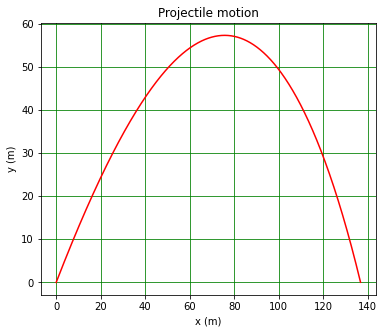

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#
#debug = True
debug = False
#
def drag(cd, area, rho, velx, vely):
    '''
    Return horizontal and vertical drag force on body given its drag coefficient, area, 
    density of medium in which it's moving and horizontal and vertical velocity.
    '''
    v2 = velx**2 + vely**2
    sinTheta = vely/np.sqrt(v2)
    cosTheta = velx/np.sqrt(v2)
    Dx = -0.5*cd*rho*area*v2*cosTheta
    Dy = -0.5*cd*rho*area*v2*sinTheta
    return Dx, Dy
#
# Initialise variables. Approximate (maximum) number of steps in calculation
if debug:
    nSteps = 5
else:
    nSteps = 1000
#
# Arrays for x and y coordinates
xStep, yStep = np.zeros(nSteps), np.zeros(nSteps) # m
#
# Initial values of x and y coordinates
xE, yE = 0.0, 0.0  # m
#
# Initial values of velocities in x and y dorections
ux, uy = 30, 40 # m/s
vX, vY = ux, uy # m/s
#
# Acceleration due to gravity
g = -9.81 # m/s**2
#
# Time for projectile fight without air resistance
tMax = -2*uy/g # s
#
# Time interval for each step
dt = tMax/nSteps
#
# Drag coefficient
CD = 0.47 
#
# Radius of spherical projectile
rad = 0.025 # m
#
# Frontal area of projectile
Area = np.pi*rad**2 # m**2
#
# Densities of air and of projectile
rhoAir = 1.2 # kg/m**3
rhoProj = 2000.0 # kg/m**3
#
# Mass of projectile
mProj = 4/3*np.pi*rad**3*rhoProj # kg
print(" ")
print("Radius {:5.3f} m, mass {:5.3f} kg.".format(rad, mProj))
print("Initial position ({:5.2f}, {:5.2f}) m.".format(xE, yE))
print("Initial velocity ({:5.2f}, {:5.2f}) m/s.".format(vX, vY))
print("Maximum time {:5.3f} s, time step {:5.3e} s.".format(tMax, dt))
#
# Step number
iStep = 0
#
# Calculate while projectile above ground level (or initial step) and number of steps less than maximum
# Look at values used to control while loop
if debug:
    print(" ")
    print("Initial tests:")
    print(f"ye = {yE} and iStep = {iStep}")
    print(f"yE > 0  = {yE > 0 }, iStep == 0 = {iStep == 0} and iStep < nSteps = {iStep < nSteps}.")
    print(f"Hence yE > 0 or iStep == 0 = {yE > 0 or iStep == 0}")
    print(f"And (yE > 0 or iStep == 0) and iStep < nSteps = {(yE > 0 or iStep == 0) and iStep < nSteps}")
#
while (yE > 0 or iStep == 0) and iStep < nSteps:
    #
    # Save coordinate values
    xStep[iStep], yStep[iStep] = xE, yE
    #
    # Update coordinates for this step
    xE = xE + vX*dt
    yE = yE + vY*dt
    #
    # Find components of drag force
    dragX, dragY = drag(CD, Area, rhoAir, vX, vY)
    #
    # Update velocities in x and y directions
    vX = vX + dragX/mProj*dt
    vY = vY + dragY/mProj*dt + g*dt
    #
    # Increment the step number
    iStep = iStep + 1
    if debug:
        print(" ")
        print("Tests for loop {iStep}")
        print(f"ye = {yE} and iStep = {iStep}")
        print(f"yE > 0  = {yE > 0 }, iStep == 0 = {iStep == 0} and iStep < nSteps = {iStep < nSteps}.")
        print(f"Hence yE > 0 or iStep == 0 = {yE > 0 or iStep == 0}")
        print(f"And (yE > 0 or iStep == 0) and iStep < nSteps = {(yE > 0 or iStep == 0) and iStep < nSteps}")
#
print(" ")
print("Final step is number {:d}, actual flight time {:5.3f} s.".format(iStep, iStep*dt))
print(" ")
plt.figure(figsize = (6, 5))
plt.title("Projectile motion")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xStep[0:iStep], yStep[0:iStep], linestyle = '-', color = 'r')
plt.grid(color = 'g')
plt.show()